In [1]:
# Spatial Distribution of San Francisco's Gini Index of Income Inequality
# Prepared by Elizabeth Owen (Individual Project)
# The purpose of this analysis is to visualize the City's inequality levels to gain a better understanding of neighborhood inequality.

In [2]:
# First, we need to import commands to visualize our data:

# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [6]:
# Import income index score file
gini = gpd.read_file('sfgini.geojson')

In [7]:
# How many rows and columns of data?
gini.shape

(198, 5)

In [8]:
# What does the data look like?
gini.head()

,geoid,name,B19083001,"B19083001, Error",geometry
0,14000US06075010100,"Census Tract 101, San Francisco, CA",0.5473,0.0381,"MULTIPOLYGON (((-122.42108 37.81289, -122.4201..."
1,14000US06075010200,"Census Tract 102, San Francisco, CA",0.5606,0.0607,"MULTIPOLYGON (((-122.42663 37.80974, -122.4265..."
2,14000US06075010300,"Census Tract 103, San Francisco, CA",0.4512,0.0376,"MULTIPOLYGON (((-122.41872 37.80593, -122.4183..."
3,14000US06075010400,"Census Tract 104, San Francisco, CA",0.5328,0.0693,"MULTIPOLYGON (((-122.41488 37.80354, -122.4137..."
4,14000US06075010500,"Census Tract 105, San Francisco, CA",0.5094,0.0544,"MULTIPOLYGON (((-122.40517 37.80476, -122.4035..."


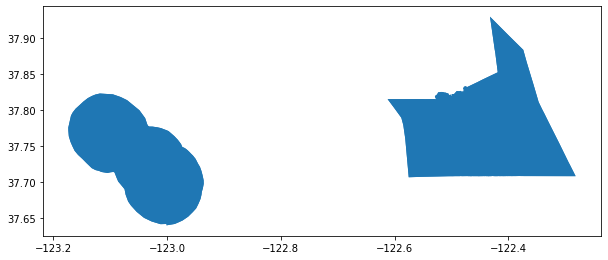

In [9]:
# Let's visualize the dataset
gini.plot(figsize=(10,10))

In [11]:
# Remove the county data row
gini = gini.drop([0])

In [12]:
gini.head()

,geoid,name,B19083001,"B19083001, Error",geometry
1,14000US06075010200,"Census Tract 102, San Francisco, CA",0.5606,0.0607,"MULTIPOLYGON (((-122.42663 37.80974, -122.4265..."
2,14000US06075010300,"Census Tract 103, San Francisco, CA",0.4512,0.0376,"MULTIPOLYGON (((-122.41872 37.80593, -122.4183..."
3,14000US06075010400,"Census Tract 104, San Francisco, CA",0.5328,0.0693,"MULTIPOLYGON (((-122.41488 37.80354, -122.4137..."
4,14000US06075010500,"Census Tract 105, San Francisco, CA",0.5094,0.0544,"MULTIPOLYGON (((-122.40517 37.80476, -122.4035..."
5,14000US06075010600,"Census Tract 106, San Francisco, CA",0.5615,0.0435,"MULTIPOLYGON (((-122.41102 37.80117, -122.4093..."


In [13]:
# Clean the data to remove error columns
list(gini)

['geoid', 'name', 'B19083001', 'B19083001, Error', 'geometry']

In [32]:
columns_to_keep = ['geoid',
     'name',
    'B19083001',
    'geometry']

In [30]:
gini = gini[columns_to_keep]

In [31]:
# Now we can visualize the cleaned up data
gini.head()

,geoid,name,B19083001,geometry
1,14000US06075010200,"Census Tract 102, San Francisco, CA",0.5606,"MULTIPOLYGON (((-122.42663 37.80974, -122.4265..."
2,14000US06075010300,"Census Tract 103, San Francisco, CA",0.4512,"MULTIPOLYGON (((-122.41872 37.80593, -122.4183..."
3,14000US06075010400,"Census Tract 104, San Francisco, CA",0.5328,"MULTIPOLYGON (((-122.41488 37.80354, -122.4137..."
4,14000US06075010500,"Census Tract 105, San Francisco, CA",0.5094,"MULTIPOLYGON (((-122.40517 37.80476, -122.4035..."
5,14000US06075010600,"Census Tract 106, San Francisco, CA",0.5615,"MULTIPOLYGON (((-122.41102 37.80117, -122.4093..."


In [33]:
# Rename headers of columns
gini.columns = ['geoid',
 'name',
  'index value',
 'geometry']

In [34]:
gini['index value'].describe()

count    195.000000
mean       0.471964
std        0.060271
min        0.196000
25%        0.433100
50%        0.466100
75%        0.502850
max        0.665900
Name: index value, dtype: float64

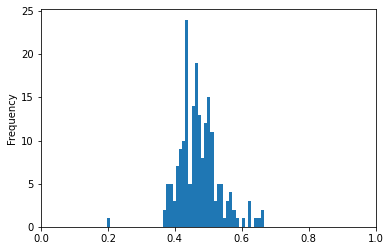

In [41]:
plt.xlim(0, 1)
gini['index value'].plot.hist(bins=50)

In [43]:
gini_sorted = gini.sort_values(by='index value',ascending = False)

In [44]:
gini_sorted[['geoid','index value']].describe()

,index value
count,195.000000
mean,0.471964
std,0.060271
min,0.196000
25%,0.433100
50%,0.466100
75%,0.502850
max,0.665900


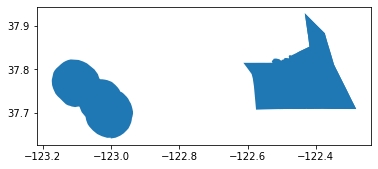

In [45]:
gini_sorted.head(100).plot()

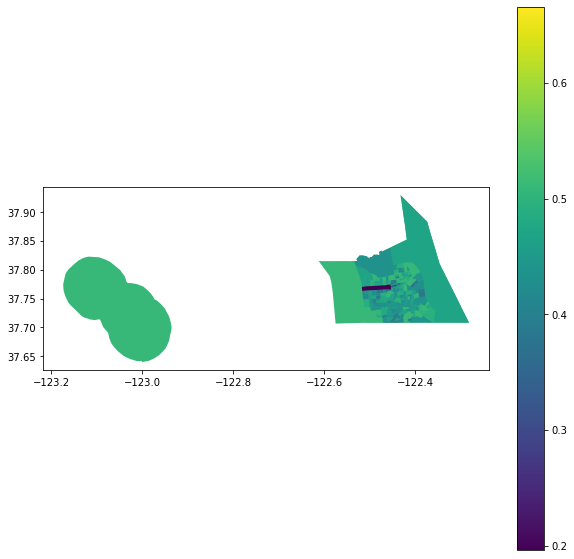

In [55]:
gini_sorted.head(10000).plot(figsize=(10,10),column='index value',legend=True)

In [ ]:
# This map shows us that the majority of San Francisco's census tracts fall between 0.4 and 0.6 Gini Income Inequality Index, thus in the middle of the distribution.

In [56]:
gini.sample(5)

,geoid,name,index value,geometry
151,14000US06075032700,"Census Tract 327, San Francisco, CA",0.4258,"MULTIPOLYGON (((-122.49608 37.76467, -122.4959..."
42,14000US06075015300,"Census Tract 153, San Francisco, CA",0.3865,"MULTIPOLYGON (((-122.44375 37.78765, -122.4421..."
169,14000US06075042602,"Census Tract 426.02, San Francisco, CA",0.4570,"MULTIPOLYGON (((-122.47871 37.78603, -122.4776..."
168,14000US06075042601,"Census Tract 426.01, San Francisco, CA",0.5033,"MULTIPOLYGON (((-122.48408 37.78580, -122.4830..."
17,14000US06075012000,"Census Tract 120, San Francisco, CA",0.4914,"MULTIPOLYGON (((-122.42208 37.78847, -122.4218..."
